# Air BnB Occupancy Rate Optimization

## Buisness Understanding
Milkah Petso is a young enterprenuer who seeks to venture into the Air BnB buisness model in the Western part of Cape Town. She has asked me to find find the optimum property in the optimum neighborhood within the given region to maximize her ocupancy so she can rent one within the area and furnish it to start her Air BnB buiseness.

## Buisness Questions
1. What factors affect occupancy rate the most in an Air BnB listing?
2. What can be done to increase the positive effects of these factors?
3. What is the best performing neighbourhood on the Western Cape in terms of occupancy rate?

## Data Understanding

### Source
The data will be sourced from the (Inside AirBnB platform )[https://insideairbnb.com/get-the-data/]. Generally quarterly data for the last 12 months.

### Description
The data contains the following columns as decsribed;
 ####   Column                            
 0.   id                               - The guest id
 1.   name                             - the name of the guest
 2.   host_id                          - the host's id
 3.   host_name                        - The host's name
 4.   neighbourhood_group              - the grouped neighboodhood
 5.   neighbourhood                    - the specific neighbourhood
 6.   latitude                         - The latitude
 7.   longitude                        - the longitude
 8.   room_type                        - the type of room
 9.   price                            - the price per night
 10.  minimum_nights                   - minimum number of nights per stay
 11.  number_of_reviews                - number of reviews
 12.  last_review                      - last review
 13.  reviews_per_month                - reviews per month
 14.  calculated_host_listings_count   - The number of listings the host has in the city/region
 15.  availability_365                 - the number of days the listing is available per year
 16.  number_of_reviews_ltm            - reviews recieved in the last twelve months
 17.  license                          - license or registration number required by local authorities for short-term rental properties


## Load Data and Relevant Libaraies

In [361]:
# Load relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [362]:
# laod data
listings = pd.read_csv('listings.csv')

In [363]:
# check the data schema
listings.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.947620,18.475990,Entire home/apt,635.0,3,79,2024-06-18,0.59,1,305,6,NaN
1,298622,Stunning Sea View apt on the Cape Peninsula,1539169,Diane,NaN,Ward 61,-34.208750,18.459400,Entire home/apt,1500.0,2,71,2024-01-17,0.47,1,286,1,NaN
2,15007,Blaauwberg House (now with inverter),59072,Dirk,NaN,Ward 23,-33.800010,18.460630,Entire home/apt,3102.0,2,46,2024-04-02,0.36,4,147,2,NaN
3,15068,Grande Bay,59318,Linda,NaN,Ward 23,-33.788260,18.459400,Entire home/apt,2000.0,4,0,NaN,NaN,5,351,0,NaN
4,357793,CityChic @ the Piazza meets Table Mountain,1802190,Liliane,NaN,Ward 115,-33.925280,18.420220,Entire home/apt,2000.0,4,224,2024-04-12,1.54,1,143,16,NaN
5,15077,Top relaxed beach living in style,59342,Georg,NaN,Ward 4,-33.858356,18.490376,Private room,1070.0,2,7,2022-06-16,0.05,6,205,0,NaN
6,357993,Beach View Studio with Balcony Walkout,1811942,Shannon,NaN,Ward 54,-33.964550,18.381130,Entire home/apt,1700.0,2,108,2024-02-08,0.86,3,199,3,NaN
7,15199,Self catering apartment,59694,Alexa,NaN,Ward 115,-33.911150,18.412350,Entire home/apt,2500.0,14,2,2016-04-15,0.02,1,365,0,NaN
8,15354,"Aurora Self Catering Units, Durbanville, Cape ...",60196,Ian,NaN,Ward 112,-33.830740,18.631420,Entire home/apt,NaN,3,0,NaN,NaN,1,0,0,NaN
9,363935,Surfers' Dream,1838554,Antje,NaN,Ward 64,-34.101830,18.474950,Entire home/apt,NaN,14,4,2020-12-30,0.04,2,0,0,NaN


In [364]:
# Check the data types in the dataframe
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23564 entries, 0 to 23563
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23564 non-null  int64  
 1   name                            23563 non-null  object 
 2   host_id                         23564 non-null  int64  
 3   host_name                       23564 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   23564 non-null  object 
 6   latitude                        23564 non-null  float64
 7   longitude                       23564 non-null  float64
 8   room_type                       23564 non-null  object 
 9   price                           20098 non-null  float64
 10  minimum_nights                  23564 non-null  int64  
 11  number_of_reviews               23564 non-null  int64  
 12  last_review                     

## Data Preparation
1. Handle the missing values in columns 'license', 'neighbourhood_group', 'price', 'last_review' and 'reviews_per_month' by imputing and dropping
2. Drop irrelevant columns
3. Feature engineering and identify a target variable

In [366]:
# Drop 'neighbourhood_group' and 'license' coluun as they have none to litte values
listings = listings.drop(columns=['neighbourhood_group', 'license'])

In [367]:
# Impute Price with median to fill in the missing values as 14.7% of the data is missing
non_null = 20098
total = 23564
percentage_missing = 100 - ((non_null / total) * 100)

print(f"{percentage_missing:.2f}%")

14.71%


In [368]:
# Fill the missing prices in the dataframe withthe median
listings['price'].fillna(listings['price'].median(), inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23564 entries, 0 to 23563
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23564 non-null  int64  
 1   name                            23563 non-null  object 
 2   host_id                         23564 non-null  int64  
 3   host_name                       23564 non-null  object 
 4   neighbourhood                   23564 non-null  object 
 5   latitude                        23564 non-null  float64
 6   longitude                       23564 non-null  float64
 7   room_type                       23564 non-null  object 
 8   price                           23564 non-null  float64
 9   minimum_nights                  23564 non-null  int64  
 10  number_of_reviews               23564 non-null  int64  
 11  last_review                     18456 non-null  object 
 12  reviews_per_month               

In [369]:
# The missing values in 'reviews_per_month' will be replaced with 0 as there were no reviews posted for that stay
nan_rows = listings[listings['reviews_per_month'].isna()]
nan_rows

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3,15068,Grande Bay,59318,Linda,Ward 23,-33.788260,18.459400,Entire home/apt,2000.0,4,0,NaN,NaN,5,351,0
8,15354,"Aurora Self Catering Units, Durbanville, Cape ...",60196,Ian,Ward 112,-33.830740,18.631420,Entire home/apt,1250.5,3,0,NaN,NaN,1,0,0
13,381267,Victorian beauty in observatory!,1912713,Katrin,Ward 57,-33.938940,18.472480,Entire home/apt,2000.0,15,0,NaN,NaN,2,308,0
15,18499,Rooms in Halaal Villa Cape Town De Tijger,71221,Abe,Ward 2,-33.890340,18.588520,Private room,1250.5,7,0,NaN,NaN,1,0,0
22,19561,Apartment in Durbanville,74188,Cherry,Ward 103,-33.842290,18.678320,Private room,1250.5,2,0,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23559,1188291221547394413,Stunning Views 1-Bedroom Getaway,172376972,Michael Sydney,Ward 74,-34.042860,18.367440,Entire home/apt,960.0,1,0,NaN,NaN,1,364,0
23560,1188334042569022164,Sea View Sanctuary at Shakawe Villa,57218252,Nox,Ward 54,-33.961045,18.380641,Entire home/apt,6287.0,2,0,NaN,NaN,134,356,0
23561,1188840308116053873,40 on L Modern Oasis with Stunning Views,586206792,Danielle,Ward 77,-33.923513,18.409937,Entire home/apt,1530.0,2,0,NaN,NaN,1,178,0
23562,1188889620955207276,Vibrant Shared Space With Neat Private Room,580470060,Bianca,Ward 115,-33.908140,18.407150,Entire home/apt,296.0,2,0,NaN,NaN,2,329,0


In [370]:
# Fill the missing value in 'reviews_per_month' with 0
listings['reviews_per_month'].fillna(0, inplace=True)

In [371]:
# Drop the columns most irrelevant to our analysis
listings = listings.drop(columns=['last_review','host_name','name','host_id', 'id'])

In [372]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23564 entries, 0 to 23563
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   23564 non-null  object 
 1   latitude                        23564 non-null  float64
 2   longitude                       23564 non-null  float64
 3   room_type                       23564 non-null  object 
 4   price                           23564 non-null  float64
 5   minimum_nights                  23564 non-null  int64  
 6   number_of_reviews               23564 non-null  int64  
 7   reviews_per_month               23564 non-null  float64
 8   calculated_host_listings_count  23564 non-null  int64  
 9   availability_365                23564 non-null  int64  
 10  number_of_reviews_ltm           23564 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 2.0+ MB


In [373]:
listings['neighbourhood'].value_counts()

neighbourhood
Ward 115    4991
Ward 54     3444
Ward 77     1542
Ward 23     1272
Ward 64     1099
            ... 
Ward 101       1
Ward 89        1
Ward 18        1
Ward 45        1
Ward 91        1
Name: count, Length: 90, dtype: int64

## Filter out the neighbourhoods with less than 100 entries

In [375]:
# Get the counts of each 'neighbourhood'
ward_counts = listings['neighbourhood'].value_counts()

# Filter out Wards with fewer than 100 entries to isolate the most relevant wards
listings = listings[listings['neighbourhood'].isin(ward_counts[ward_counts >= 100].index)]

# Verify the results
listings['neighbourhood'].value_counts()

neighbourhood
Ward 115    4991
Ward 54     3444
Ward 77     1542
Ward 23     1272
Ward 64     1099
Ward 74     1064
Ward 61      997
Ward 107     707
Ward 62      672
Ward 55      632
Ward 59      560
Ward 69      496
Ward 57      493
Ward 58      426
Ward 15      424
Ward 100     407
Ward 84      359
Ward 113     337
Ward 83      320
Ward 4       297
Ward 71      274
Ward 73      253
Ward 1       230
Ward 70      228
Ward 21      180
Ward 53      175
Ward 2       147
Ward 112     139
Ward 105     107
Name: count, dtype: int64

In [376]:
# Drop any Null vaues in the dataframe
listings.dropna()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Ward 57,-33.947620,18.475990,Entire home/apt,635.0,3,79,0.59,1,305,6
1,Ward 61,-34.208750,18.459400,Entire home/apt,1500.0,2,71,0.47,1,286,1
2,Ward 23,-33.800010,18.460630,Entire home/apt,3102.0,2,46,0.36,4,147,2
3,Ward 23,-33.788260,18.459400,Entire home/apt,2000.0,4,0,0.00,5,351,0
4,Ward 115,-33.925280,18.420220,Entire home/apt,2000.0,4,224,1.54,1,143,16
...,...,...,...,...,...,...,...,...,...,...,...
23559,Ward 74,-34.042860,18.367440,Entire home/apt,960.0,1,0,0.00,1,364,0
23560,Ward 54,-33.961045,18.380641,Entire home/apt,6287.0,2,0,0.00,134,356,0
23561,Ward 77,-33.923513,18.409937,Entire home/apt,1530.0,2,0,0.00,1,178,0
23562,Ward 115,-33.908140,18.407150,Entire home/apt,296.0,2,0,0.00,2,329,0


## Feature Engineering

In [378]:
# Drop irrelvant columns

# create list of relevant columns
relevant_columns = ['neighbourhood','latitude','longitude','number_of_reviews','room_type','minimum_nights']

listings = listings[relevant_columns]


In [379]:
# Check the values of the categorical values in room_type
listings['room_type'].value_counts()

room_type
Entire home/apt    18542
Private room        3537
Hotel room           141
Shared room           52
Name: count, dtype: int64

In [380]:
# One-hot encode the 'room_type' column
listings = pd.get_dummies(listings, columns=['room_type'], prefix='room_type', drop_first=False, dtype=int)

# Display the first few rows to verify the one-hot encoding
print(listings.head())


  neighbourhood  latitude  longitude  number_of_reviews  minimum_nights  \
0       Ward 57 -33.94762   18.47599                 79               3   
1       Ward 61 -34.20875   18.45940                 71               2   
2       Ward 23 -33.80001   18.46063                 46               2   
3       Ward 23 -33.78826   18.45940                  0               4   
4      Ward 115 -33.92528   18.42022                224               4   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
0                          1                     0                       0   
1                          1                     0                       0   
2                          1                     0                       0   
3                          1                     0                       0   
4                          1                     0                       0   

   room_type_Shared room  
0                      0  
1                      0  

In [381]:
listings.shape

(22272, 9)

## Calculating The Occupancy Rate
Using the domain knowledge provided in the Inside Air BnB site, we have been provided with what affects occupancy rate. Below is an excerpt from the Data Assumptions tab in the site

1. A Review Rate of 50% is used to convert reviews to estimated bookings.
Alex Marqusee uses a review rate of 72%, however this is attributed to an unreliable source: Airbnb's CEO and co-founder Brian Chesky.
The Budget and Legislative Analyst's Office (page 49) also use a value 72% for their review rate, and in addition, introduce a higher impact model using a review rate of 30.5% - based on comparing public data of reviews to the The New York Attorney General’s report on Airbnb released in October 2014. Inside Airbnb analysis found that using a review rate 30.5% is more fact based, however probably not conservative enough, given that the Budget and Legislative Analyst's Office did not take into account missing reviews because of deleted listings. A review rate of 72% is unverifiable - therefore 50% was chosen as it sits almost exactly between 72% and 30.5%.

2. An average length of stay, where avaialble, is configured for each city, and this, multiplied by the estimated bookings for each listing over a period gives the occupancy rate
Where statements have been made about the average length of stay of Airbnb guests for a city, this was used. For example, Airbnb reported 5.5 nights as the average length of stay for guests using Airbnb in South Africa. Where no public statements were made about average stays, a value of 3 nights per booking was used. If a listing has a higher minimum nights value than the average length of stay, the minimum nights value was used instead.

3. The occupancy rate was capped at 70% - a relatively high, but reasonable number for a highly occupied "hotel".
This controls for situations where an Airbnb host might change their minimum nights during the high season, without the review data having a chance to catch up; or for a listing with a very high review rate.
It also ensures that the occupancy model remains conservative.

4. Number of nights booked or available per year for the high availability and frequently rented metrics and filters were generally aligned with a city's short term rental laws designed to protect residential housing.

Going by these statements in the assumption above we can calculate an estimated occupancy rate for each entry in 'listing'.

In [383]:
# Set the review rate (use 50% as the conservative estimate for thr review rate)
review_rate = 0.50

# Set the default average length of stay at 3 nights per and cap occupancy rate at 70%
default_length_of_stay = 3
max_occupancy_rate = 0.70

# Calculate estimated bookings (review rate * number of reviews)
listings['estimated_bookings'] = listings['number_of_reviews'] * review_rate

# Use the higher of the default length of stay or the minimum nights
listings['effective_length_of_stay'] = np.maximum(
    listings['minimum_nights'],
    default_length_of_stay
)

# Calculate occupancy rate
listings['occupancy_rate'] = (listings['estimated_bookings'] * listings['effective_length_of_stay']) / 365

# Cap the occupancy rate at the maximum allowed value
listings['occupancy_rate'] = np.minimum(listings['occupancy_rate'], max_occupancy_rate)

# Optionally, drop the temporary columns if they're not needed
listings.drop(columns=['estimated_bookings', 'effective_length_of_stay'], inplace=True)

# Display the DataFrame with the new column
print(listings.head())


  neighbourhood  latitude  longitude  number_of_reviews  minimum_nights  \
0       Ward 57 -33.94762   18.47599                 79               3   
1       Ward 61 -34.20875   18.45940                 71               2   
2       Ward 23 -33.80001   18.46063                 46               2   
3       Ward 23 -33.78826   18.45940                  0               4   
4      Ward 115 -33.92528   18.42022                224               4   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
0                          1                     0                       0   
1                          1                     0                       0   
2                          1                     0                       0   
3                          1                     0                       0   
4                          1                     0                       0   

   room_type_Shared room  occupancy_rate  
0                      0        0.324

### Binning The Occupancy Rate into Categorical Values
We see a stronger positive correlation of occupancy rate with number_of_reviews. We can use this as the Endogenus variable in our baseline model.
We will bin the values of occupancy rate into 'Low', 'Medium' and 'High'
- Low: Values between 0 and 0.2.
- Medium: Values between 0.2 and 0.5.
- High: Values between 0.5 and 0.7.

In [385]:
# Define categories based on quantiles
listings['occupancy_rate_category'] = pd.qcut(
    listings
    ['occupancy_rate'], q=3, labels=['Low', 'Medium', 'High']
)
listings.head(20)

,neighbourhood,latitude,longitude,number_of_reviews,minimum_nights,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,occupancy_rate,occupancy_rate_category
0,Ward 57,-33.947620,18.475990,79,3,1,0,0,0,0.324658,High
1,Ward 61,-34.208750,18.459400,71,2,1,0,0,0,0.291781,High
2,Ward 23,-33.800010,18.460630,46,2,1,0,0,0,0.189041,High
3,Ward 23,-33.788260,18.459400,0,4,1,0,0,0,0.000000,Low
4,Ward 115,-33.925280,18.420220,224,4,1,0,0,0,0.700000,High
5,Ward 4,-33.858356,18.490376,7,2,0,0,1,0,0.028767,Medium
6,Ward 54,-33.964550,18.381130,108,2,1,0,0,0,0.443836,High
7,Ward 115,-33.911150,18.412350,2,14,1,0,0,0,0.038356,Medium
8,Ward 112,-33.830740,18.631420,0,3,1,0,0,0,0.000000,Low
9,Ward 64,-34.101830,18.474950,4,14,1,0,0,0,0.076712,Medium


## Exploratory Data Analysis

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23012\950174035.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = listings.groupby(['neighbourhood', 'occupancy_rate_category']).size().reset_index(name='Count')


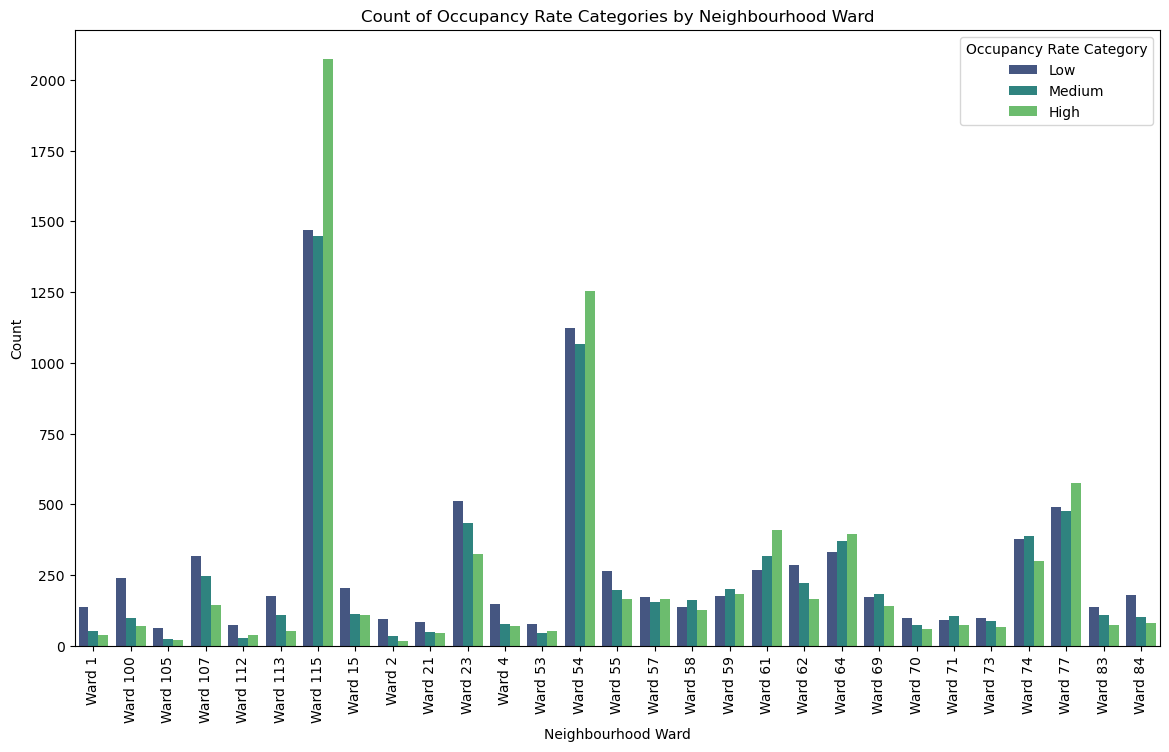

In [387]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Count the number of occurrences of each occupancy rate category in each neighbourhood
count_df = listings.groupby(['neighbourhood', 'occupancy_rate_category']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=count_df, x='neighbourhood', hue='occupancy_rate_category', y='Count', palette='viridis')

plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Count of Occupancy Rate Categories by Neighbourhood Ward')
plt.xlabel('Neighbourhood Ward')
plt.ylabel('Count')
plt.legend(title='Occupancy Rate Category')
plt.show()


Going by the barchart above the ward with the highest occupancy rate seems o be the Ward 115.

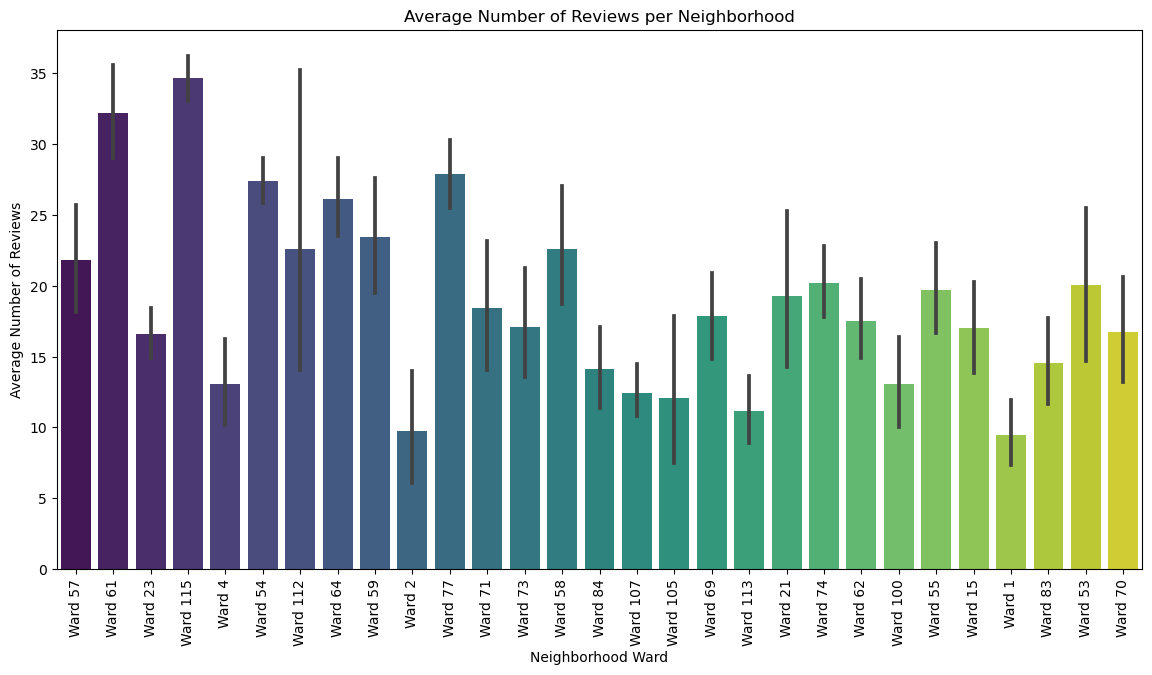

In [389]:
plt.figure(figsize=(14, 7))
sns.barplot(x='neighbourhood', y='number_of_reviews', data=listings, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Number of Reviews per Neighborhood')
plt.xlabel('Neighborhood Ward')
plt.ylabel('Average Number of Reviews')
plt.show()

Going by the number of reviews in the bar chart above as well Ward 115 seems to have the most number of reviews

### Perform a Chi-Square Test on Neighbourhood and Occupancy Rate

Since our exploratory analysis revealed a relationship between occupancy rate and neighbourhood we'll perform a chi_square test to confrirm this.

Null Hypothesis: Neighbourhood has NO significant relationship to the Occupancy Rate

Alternative Hypothesis: Neighbourhood has NO significant relationship to the Occupancy Rate

In [393]:
# Import necessary libraries

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(listings['neighbourhood'], listings['occupancy_rate_category'])
contingency_table

occupancy_rate_category,Low,Medium,High
neighbourhood,,,
Ward 1,139,54,37
Ward 100,241,97,69
Ward 105,64,23,20
Ward 107,316,246,145
Ward 112,73,29,37
Ward 113,176,108,53
Ward 115,1469,1449,2073
Ward 15,203,112,109
Ward 2,94,35,18


In [394]:
# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 891.5473829196786
p-value: 8.30082133627707e-151
Degrees of freedom: 56
Expected frequencies:
[[  82.63559626   72.02990302   75.33450072]
 [ 146.22907687  127.46161099  133.30931214]
 [  38.44351652   33.50956358   35.0469199 ]
 [ 254.01463721  221.41365841  231.57170438]
 [  49.94064296   43.5311153    45.52824174]
 [ 121.07911279  105.53946659  110.38142062]
 [1793.19243894 1563.04889547 1634.75866559]
 [ 152.33692529  132.78556034  138.87751437]
 [  52.81492457   46.03650323   48.1485722 ]
 [  64.67133621   56.37122845   58.95743534]
 [ 457.01077586  398.35668103  416.6325431 ]
 [ 106.70770474   93.01252694   97.27976832]
 [  62.8749102    54.80536099   57.31972881]
 [1237.37823276 1078.56950431 1128.05226293]
 [ 227.06824713  197.92564655  207.00610632]
 [ 177.12760417  154.39453125  161.47786458]
 [ 153.05549569  133.41190733  139.53259698]
 [ 201.19971264  175.37715517  183.42313218]
 [ 358.20734555  312.23397091  326.55868355]
 [ 241.43965517  210.45258621

Significance: Because the p-value is so small, you reject the null hypothesis. This means there is a statistically significant association between the variables in your contingency table.

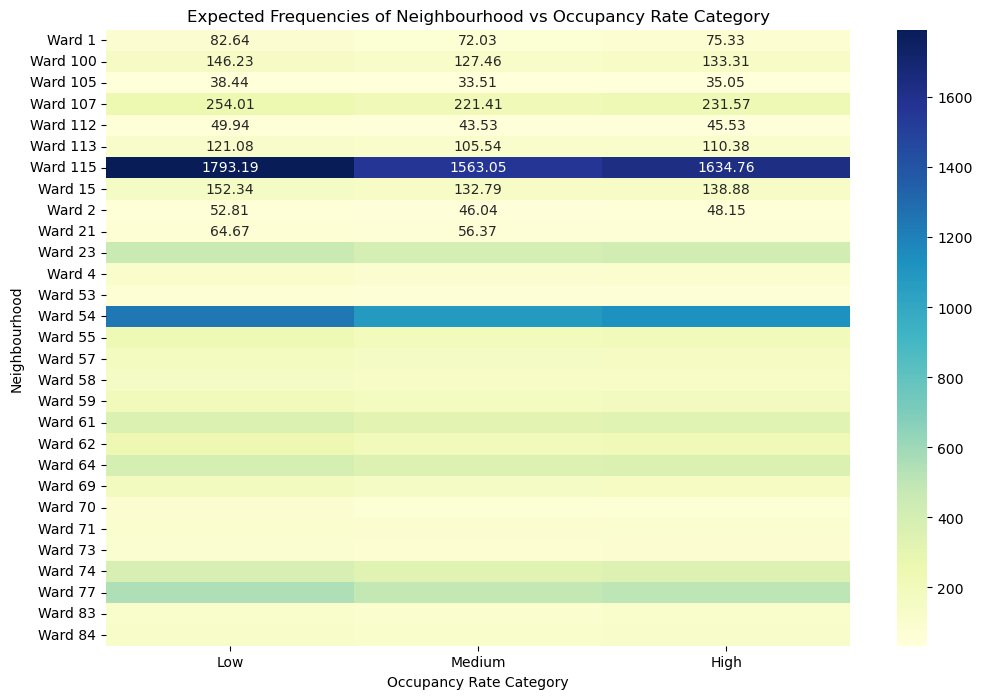

In [396]:
import seaborn as sns
import matplotlib.pyplot as plt

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
# Plotting the expected frequencies
plt.figure(figsize=(12, 8))
sns.heatmap(expected_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Expected Frequencies of Neighbourhood vs Occupancy Rate Category')
plt.xlabel('Occupancy Rate Category')
plt.ylabel('Neighbourhood')
plt.show()


*Significance Alpha (p_value)*: The p-value is far below the common significance level of 0.05 (or even 0.01), suggesting that the relationship between neighbourhood and occupancy_rate_category is statistically significant. This means that the distribution of occupancy_rate_category is significantly different across different neighbourhoods.

*Chi-square Statistic*: The high value indicates a strong association between the variables. The larger the Chi-square statistic relative to the degrees of freedom, the stronger the association.

*Expected Frequencies*: The expected frequencies provide a baseline for comparison. The fact that the Chi-square statistic is large relative to the degrees of freedom implies that the observed frequencies deviate significantly from these expected values, reinforcing the conclusion that there is a strong association between the neighbourhood and occupancy_rate_category.

### OneHot Encode our 'neighbourhood' and 'Occupancy_rate_category' variable for better plotting with our models

In [399]:
# Import the relevant libararies
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the 'neighbourhood' column
neigh_cat_ohe = ohe.fit_transform(listings[['neighbourhood']])

# Convert the resulting array back to a DataFrame for easier use
neigh_cat_ohe_df = pd.DataFrame(neigh_cat_ohe, columns=ohe.get_feature_names_out(['neighbourhood']))

# Reset the index of the new DataFrame to match the original listings DataFrame
neigh_cat_ohe_df.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded columns back to the original `listings` DataFrame
listings_ohe = pd.concat([listings.drop(columns=['neighbourhood']), neigh_cat_ohe_df], axis=1)

# Display the final DataFrame
listings_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23478 entries, 0 to 22246
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   latitude                   22272 non-null  float64 
 1   longitude                  22272 non-null  float64 
 2   number_of_reviews          22272 non-null  float64 
 3   minimum_nights             22272 non-null  float64 
 4   room_type_Entire home/apt  22272 non-null  float64 
 5   room_type_Hotel room       22272 non-null  float64 
 6   room_type_Private room     22272 non-null  float64 
 7   room_type_Shared room      22272 non-null  float64 
 8   occupancy_rate             22272 non-null  float64 
 9   occupancy_rate_category    22272 non-null  category
 10  neighbourhood_Ward 100     22272 non-null  float64 
 11  neighbourhood_Ward 105     22272 non-null  float64 
 12  neighbourhood_Ward 107     22272 non-null  float64 
 13  neighbourhood_Ward 112     22272 non

In [400]:
# Check for any NaN Values
nan_counts = listings_ohe.isna().sum()
print(nan_counts)

latitude                     1206
longitude                    1206
number_of_reviews            1206
minimum_nights               1206
room_type_Entire home/apt    1206
room_type_Hotel room         1206
room_type_Private room       1206
room_type_Shared room        1206
occupancy_rate               1206
occupancy_rate_category      1206
neighbourhood_Ward 100       1206
neighbourhood_Ward 105       1206
neighbourhood_Ward 107       1206
neighbourhood_Ward 112       1206
neighbourhood_Ward 113       1206
neighbourhood_Ward 115       1206
neighbourhood_Ward 15        1206
neighbourhood_Ward 2         1206
neighbourhood_Ward 21        1206
neighbourhood_Ward 23        1206
neighbourhood_Ward 4         1206
neighbourhood_Ward 53        1206
neighbourhood_Ward 54        1206
neighbourhood_Ward 55        1206
neighbourhood_Ward 57        1206
neighbourhood_Ward 58        1206
neighbourhood_Ward 59        1206
neighbourhood_Ward 61        1206
neighbourhood_Ward 62        1206
neighbourhood_

In [401]:
listings_ohe.dropna(inplace=True)

In [402]:
nan_counts2 = listings_ohe.isna().sum()
print(nan_counts2)

latitude                     0
longitude                    0
number_of_reviews            0
minimum_nights               0
room_type_Entire home/apt    0
room_type_Hotel room         0
room_type_Private room       0
room_type_Shared room        0
occupancy_rate               0
occupancy_rate_category      0
neighbourhood_Ward 100       0
neighbourhood_Ward 105       0
neighbourhood_Ward 107       0
neighbourhood_Ward 112       0
neighbourhood_Ward 113       0
neighbourhood_Ward 115       0
neighbourhood_Ward 15        0
neighbourhood_Ward 2         0
neighbourhood_Ward 21        0
neighbourhood_Ward 23        0
neighbourhood_Ward 4         0
neighbourhood_Ward 53        0
neighbourhood_Ward 54        0
neighbourhood_Ward 55        0
neighbourhood_Ward 57        0
neighbourhood_Ward 58        0
neighbourhood_Ward 59        0
neighbourhood_Ward 61        0
neighbourhood_Ward 62        0
neighbourhood_Ward 64        0
neighbourhood_Ward 69        0
neighbourhood_Ward 70        0
neighbou

In [404]:
# Encdode the 'Occupancy_rate_category' column
from sklearn.preprocessing import LabelEncoder

# Label encode the 'occupancy_rate_category' column
listings_ohe['occupancy_rate_category_encoded'] = LabelEncoder().fit_transform(listings_ohe['occupancy_rate_category'])

# Drop the 'occupancy_rate' and 'occupancy_rate_category' columns
listings_ohe.drop(['occupancy_rate_category'], axis=1, inplace=True)

In [405]:
listings_final = listings_ohe.drop(['latitude', 'longitude'], axis=1)
print(listings_final.dtypes)


number_of_reviews                  float64
minimum_nights                     float64
room_type_Entire home/apt          float64
room_type_Hotel room               float64
room_type_Private room             float64
room_type_Shared room              float64
occupancy_rate                     float64
neighbourhood_Ward 100             float64
neighbourhood_Ward 105             float64
neighbourhood_Ward 107             float64
neighbourhood_Ward 112             float64
neighbourhood_Ward 113             float64
neighbourhood_Ward 115             float64
neighbourhood_Ward 15              float64
neighbourhood_Ward 2               float64
neighbourhood_Ward 21              float64
neighbourhood_Ward 23              float64
neighbourhood_Ward 4               float64
neighbourhood_Ward 53              float64
neighbourhood_Ward 54              float64
neighbourhood_Ward 55              float64
neighbourhood_Ward 57              float64
neighbourhood_Ward 58              float64
neighbourho

## Split the data into Training and Test data

In [407]:
from sklearn.model_selection import train_test_split


# Features (excluding the target variable)
X = listings_final.drop('occupancy_rate_category_encoded', axis=1)

# Target variable
y = listings_final['occupancy_rate_category_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Model Building

Since we are predicting using categorical variables, we'll use tow classification models
1. 
2. Random Forest

### Decision Tree
The first model we are going to build is a decision tree classifier

In [409]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2191
           1       1.00      1.00      1.00      2021
           2       1.00      1.00      1.00      2108

    accuracy                           1.00      6320
   macro avg       1.00      1.00      1.00      6320
weighted avg       1.00      1.00      1.00      6320



In [410]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best model
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best}")
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best))


Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model Accuracy: 1.0
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2191
           1       1.00      1.00      1.00      2021
           2       1.00      1.00      1.00      2108

    accuracy                           1.00      6320
   macro avg       1.00      1.00      1.00      6320
weighted avg       1.00      1.00      1.00      6320



In [411]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

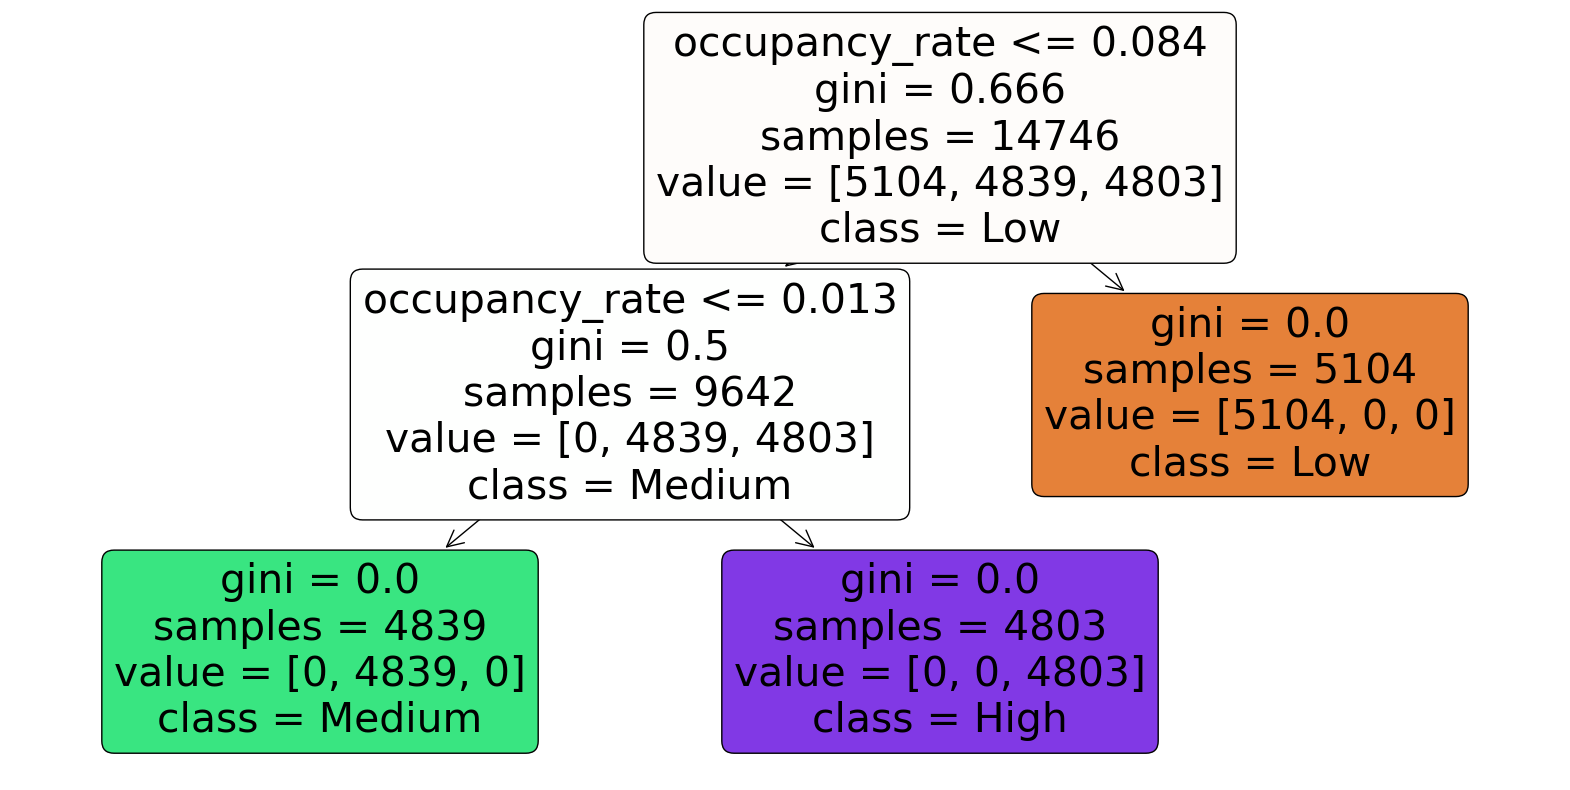

In [412]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Low', 'Medium', 'High'], rounded=True)
plt.show()


In [413]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=2000)

# Train the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=2000, random_state=42)

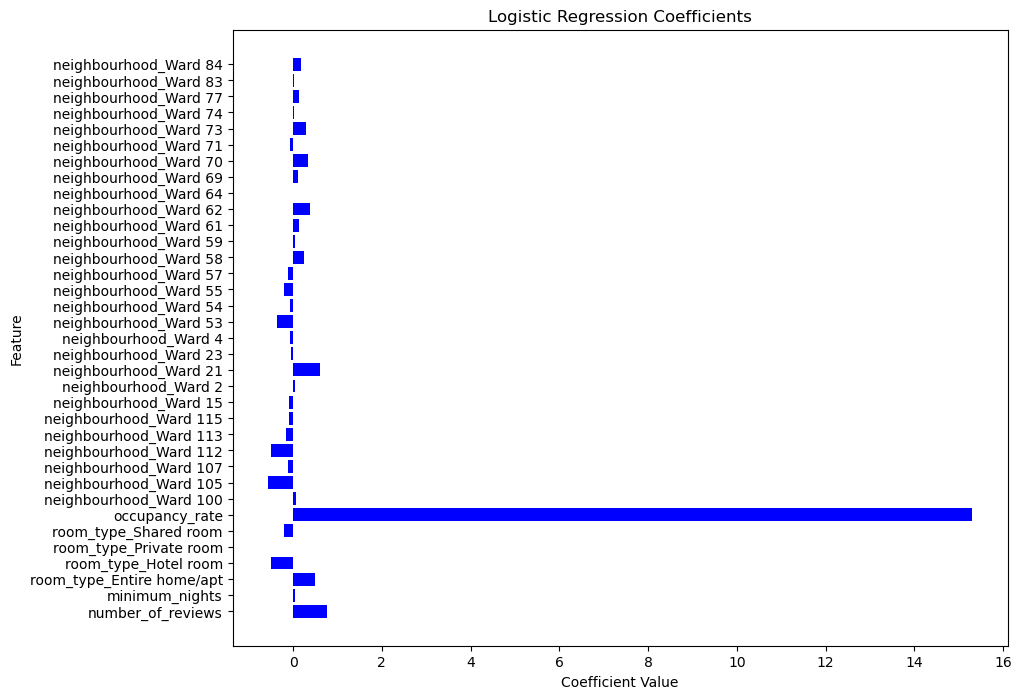

In [414]:
# Get the coefficients from the logistic regression model
coefficients = logreg.coef_[0]

# Create a bar plot for the coefficients
plt.figure(figsize=(10, 8))
plt.barh(X.columns, coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()


In [415]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [416]:
# Predict on the entire dataset
listings_final['predicted_category'] = rf_classifier.predict(X)

# Calculate average occupancy rate for each ward
# Note: Ensure 'Ward' column is available in your DataFrame for grouping
ward_data = listings_final.copy()
ward_data['Ward'] = ward_data.filter(like='neighbourhood_Ward').idxmax(axis=1)  # Extract the ward with max value
highest_occupancy_ward = ward_data.groupby('Ward')['predicted_category'].mean().idxmax()

print(f'Ward with the highest predicted occupancy rate: {highest_occupancy_ward}')

Ward with the highest predicted occupancy rate: neighbourhood_Ward 107


Feature ranking:
1. feature occupancy_rate (0.5455852979153646)
2. feature number_of_reviews (0.4102209026430522)
3. feature minimum_nights (0.026064815522251445)
4. feature room_type_Entire home/apt (0.008611273460757412)
5. feature room_type_Private room (0.005269773485675005)
6. feature neighbourhood_Ward 115 (0.00033041291752709134)
7. feature neighbourhood_Ward 107 (0.0002938565621640527)
8. feature neighbourhood_Ward 69 (0.00024232267031420348)
9. feature room_type_Hotel room (0.000215862601615923)
10. feature neighbourhood_Ward 70 (0.0002095180736220092)
11. feature room_type_Shared room (0.00020753382183505973)
12. feature neighbourhood_Ward 54 (0.00017133743459013862)
13. feature neighbourhood_Ward 77 (0.00015810455307773953)
14. feature neighbourhood_Ward 62 (0.00014489601633707632)
15. feature neighbourhood_Ward 64 (0.00013918864419782155)
16. feature neighbourhood_Ward 74 (0.0001353445599884157)
17. feature neighbourhood_Ward 100 (0.00013435896456223537)
18. feature neighbo

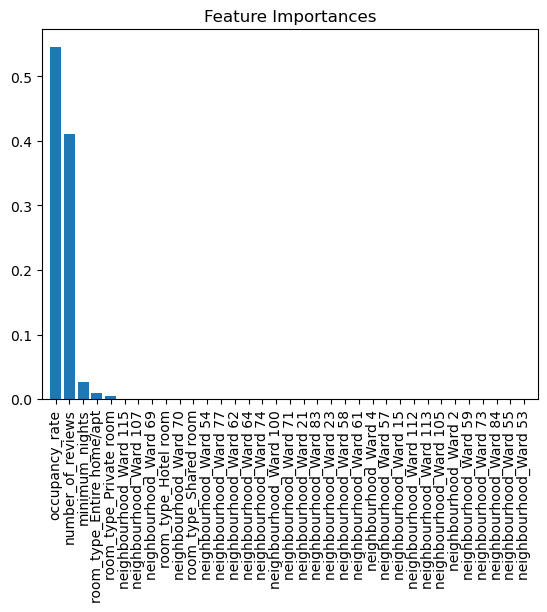

In [417]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()